In [42]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print('=3')

=3


In [43]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [44]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


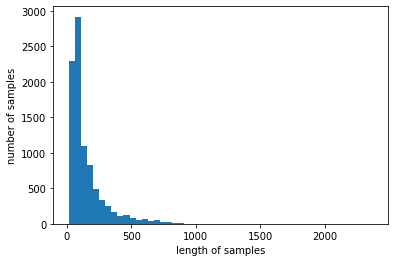

In [45]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

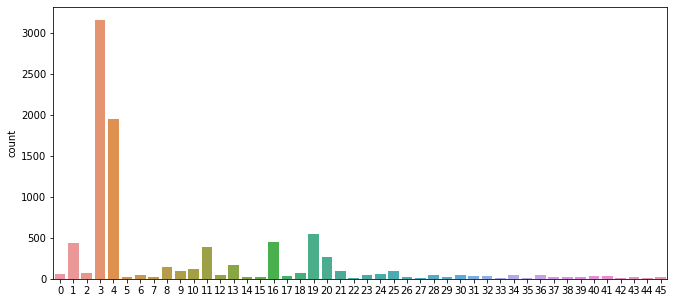

In [46]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [47]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [48]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

=3


In [49]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [50]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

=3


In [51]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [52]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)  
    
x_train = decoded
print(len(x_train))

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

8982
2246


In [53]:
x_train[:5]

['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 "<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3",
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect th

In [54]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration sra chairman arsenio yulo said yu

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


In [56]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


In [57]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


# 모델 실험

In [58]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

print('=3')

=3


## 1. 나이브 베이즈 분류기

In [59]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [60]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.5997328584149599


## F1-Score, Confusion Matrix

In [61]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('=3')

=3


In [62]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.21      0.33       105
           2       0.00      0.00      0.00        20
           3       0.72      0.92      0.81       813
           4       0.45      0.96      0.61       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.80      0.29      0.42        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.75      0.18      0.29        99
          17       0.00    

In [63]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

print('=3')

=3


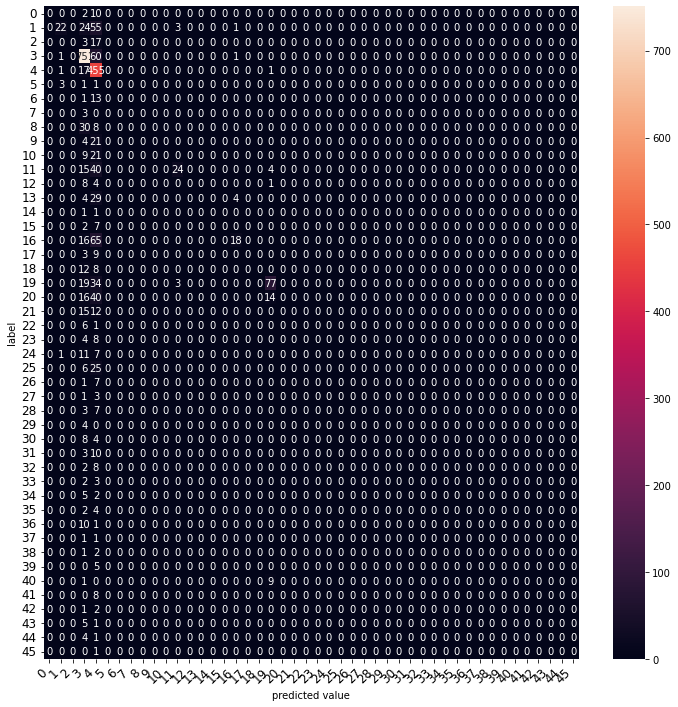

In [64]:
graph_confusion_matrix(model, tfidfv_test, y_test)

## 2. Complement Naive Bayes Classifier(CNB)

In [65]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [66]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7649154051647373


## 3. 로지스틱 회귀(Logistic Regression)

In [67]:
# 10분 정도 소요됩니다.
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)

LogisticRegression(C=10000, max_iter=3000)

In [70]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8165627782724845


## 4. 선형 서포트 벡터 머신(Linear Support Vector Machine)

In [71]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [72]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.788512911843277


## 5. 결정 트리(Decision Tree)

In [73]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [74]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6211041852181657


## 6. 랜덤 포레스트(Random Forest)

In [76]:
#estimator를 5로 설정하고 random_state를 0으로 설정한 RandomForestClassifier를 선언해주세요.
#참고자료 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, max_depth=2, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(max_depth=2, n_estimators=5, random_state=0)

In [77]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.4888691006233304


## 7. 그래디언트 부스팅 트리(GradientBoostingClassifier)

In [78]:
# 15분 정도 소요될 수 있습니다.
grbt = GradientBoostingClassifier(random_state=0, verbose=3) # verbose=3
grbt.fit(tfidfv, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.4301           15.48m
         2       76760.8864           15.37m
         3   766490025.2967           15.25m
         4 660857139232122368.0000           15.11m
         5 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           14.97m
         6 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           14.82m
         7 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           14.67m
         8 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           14.52m
         9 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584

GradientBoostingClassifier(random_state=0, verbose=3)

In [79]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7702582368655387


## 8. 보팅(Voting)

In [81]:
clf1 = LogisticRegression(penalty='l2', random_state=0, max_iter=500)
clf2 = GradientBoostingClassifier(n_estimators=50, random_state=0)
clf3 = ComplementNB()


voting_classifier = VotingClassifier(estimators=[
    ('lr', clf1), ('gb', clf2), ('cnb', clf3)], voting='soft')

voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=500, random_state=0)),
                             ('gb',
                              GradientBoostingClassifier(n_estimators=50,
                                                         random_state=0)),
                             ('cnb', ComplementNB())],
                 voting='soft')

In [82]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8000890471950134


---

---

---

# num_words = 5000

In [83]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [84]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [48]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

=3


In [85]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [86]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

=3


In [87]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [88]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

8982
2246


In [89]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


In [90]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 4867)


In [91]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 4867)


# 모델 실험

In [92]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

print('=3')

=3


## 1. 나이브 베이즈 분류기

In [93]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [94]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6731967943009796


## F1-Score, Confusion Matrix

In [95]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('=3')

=3


In [96]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.50      0.80      0.62       105
           2       0.00      0.00      0.00        20
           3       0.86      0.89      0.87       813
           4       0.59      0.95      0.73       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.28      0.44        25
          10       0.00      0.00      0.00        30
          11       0.48      0.73      0.58        83
          12       0.00      0.00      0.00        13
          13       1.00      0.14      0.24        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.66      0.62        99
          17       0.00    

In [97]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

print('=3')

=3


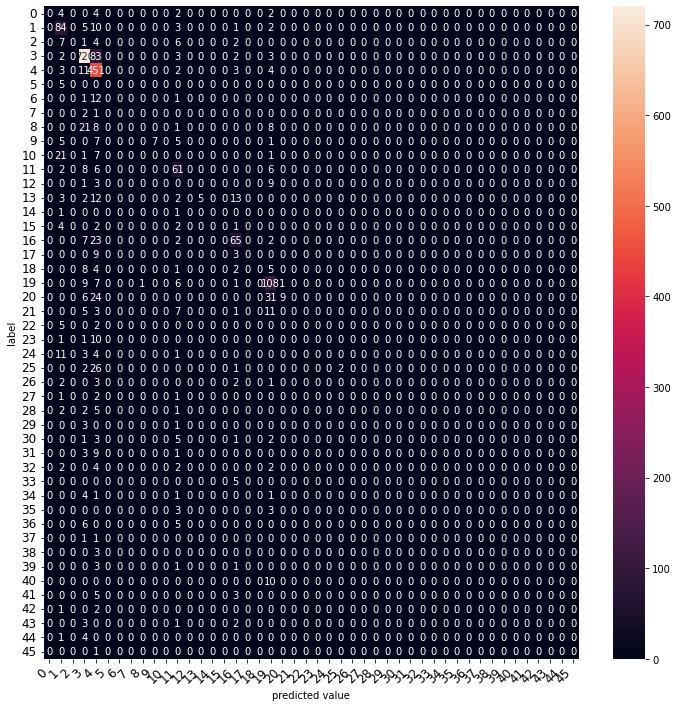

In [98]:
graph_confusion_matrix(model, tfidfv_test, y_test)

## 2. Complement Naive Bayes Classifier(CNB)

In [99]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [100]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


## 3. 로지스틱 회귀(Logistic Regression)

In [101]:
# 10분 정도 소요됩니다.
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)

LogisticRegression(C=10000, max_iter=3000)

In [102]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8036509349955476


## 4. 선형 서포트 벡터 머신(Linear Support Vector Machine)

In [103]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [104]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


## 5. 결정 트리(Decision Tree)

In [105]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [106]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6179875333926982


## 6. 랜덤 포레스트(Random Forest)

In [108]:
#estimator를 5로 설정하고 random_state를 0으로 설정한 RandomForestClassifier를 선언해주세요.
#참고자료 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, max_depth=2, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(max_depth=2, n_estimators=5, random_state=0)

In [109]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.41896705253784505


## 7. 그래디언트 부스팅 트리(GradientBoostingClassifier)

In [110]:
# 15분 정도 소요될 수 있습니다.
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [111]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.767586821015138


## 8. 보팅(Voting)

In [112]:
clf1 = LogisticRegression(penalty='l2', random_state=0, max_iter=500)
clf2 = GradientBoostingClassifier(n_estimators=50, random_state=0)
clf3 = ComplementNB()


voting_classifier = VotingClassifier(estimators=[
    ('lr', clf1), ('gb', clf2), ('cnb', clf3)], voting='soft')

voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=500, random_state=0)),
                             ('gb',
                              GradientBoostingClassifier(n_estimators=50,
                                                         random_state=0)),
                             ('cnb', ComplementNB())],
                 voting='soft')

In [113]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7960819234194123


---

---

---

# num_words = 7,500

In [114]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=7500, test_split=0.2)

In [115]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [48]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

=3


In [116]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [117]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

=3


In [118]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [119]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

8982
2246


In [120]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


In [121]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 7296)


In [122]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 7296)


# 모델 실험

In [123]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

print('=3')

=3


## 1. 나이브 베이즈 분류기

In [124]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [125]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6642920747996438


## F1-Score, Confusion Matrix

In [126]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('=3')

=3


In [127]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.57      0.75      0.65       105
           2       0.00      0.00      0.00        20
           3       0.83      0.89      0.86       813
           4       0.55      0.95      0.69       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.16      0.28        25
          10       0.00      0.00      0.00        30
          11       0.54      0.69      0.61        83
          12       0.00      0.00      0.00        13
          13       1.00      0.05      0.10        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.64      0.62      0.63        99
          17       0.00    

In [128]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

print('=3')

=3


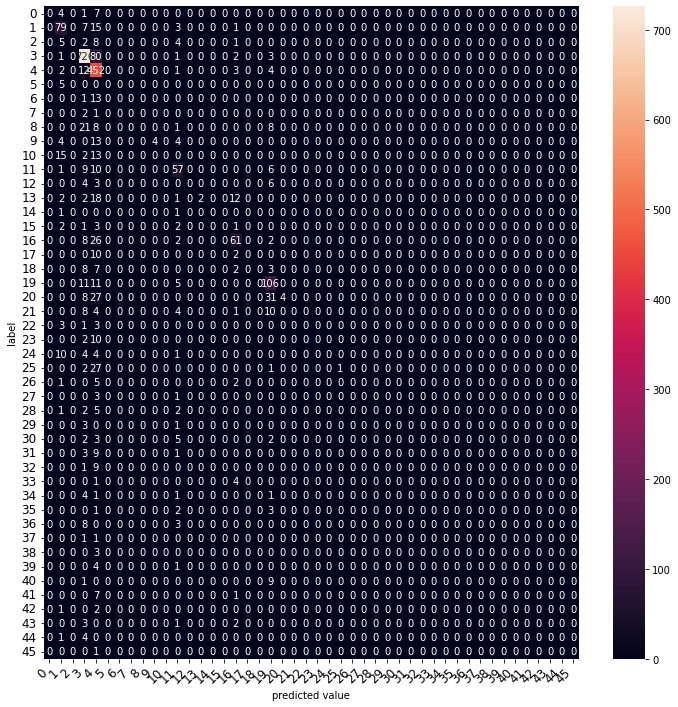

In [129]:
graph_confusion_matrix(model, tfidfv_test, y_test)

## 2. Complement Naive Bayes Classifier(CNB)

In [130]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [131]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7693677649154052


## 3. 로지스틱 회귀(Logistic Regression)

In [132]:
# 10분 정도 소요됩니다.
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)

LogisticRegression(C=10000, max_iter=3000)

In [133]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8040961709706145


## 4. 선형 서포트 벡터 머신(Linear Support Vector Machine)

In [134]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [135]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7813891362422084


## 5. 결정 트리(Decision Tree)

In [136]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [137]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6202137132680321


## 6. 랜덤 포레스트(Random Forest)

In [139]:
#estimator를 5로 설정하고 random_state를 0으로 설정한 RandomForestClassifier를 선언해주세요.
#참고자료 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, max_depth=2, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(max_depth=2, n_estimators=5, random_state=0)

In [140]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.4479073909171861


## 7. 그래디언트 부스팅 트리(GradientBoostingClassifier)

In [141]:
# 15분 정도 소요될 수 있습니다.
grbt = GradientBoostingClassifier(random_state=0, verbose=3) # verbose=3
grbt.fit(tfidfv, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.4615           14.54m
         2       17295.3135           14.58m
         3   766430528.8453           14.43m
         4 450894550348330880.0000           14.32m
         5 2095042633646860178453929072057861269238987980194085277337947388270850312260026368.0000           14.18m
         6 2095042633646860178453929072057861269238987980194085277337947388270850312260026368.0000           14.04m
         7 2095042633646860178453929072057861269238987980194085277337947388270850312260026368.0000           13.88m
         8 2095042633646860178453929072057861269238987980194085277337947388270850312260026368.0000           13.74m
         9 2095042633646860178453929072057861269238987980194085277337947388270850312260026368.0000           13.61m
        10 2095042633646860178453929072057861269238987980194085277337947388270850312260026368.0000           13.47m
        11 209504263364686017845392907205786126923898798019408527733794

GradientBoostingClassifier(random_state=0, verbose=3)

In [142]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7693677649154052


## 8. 보팅(Voting)

In [144]:
clf1 = LogisticRegression(penalty='l2', random_state=0, max_iter=500)
clf2 = GradientBoostingClassifier(n_estimators=50, random_state=0)
clf3 = ComplementNB()


voting_classifier = VotingClassifier(estimators=[
    ('lr', clf1), ('gb', clf2), ('cnb', clf3)], voting='soft')

voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=500, random_state=0)),
                             ('gb',
                              GradientBoostingClassifier(n_estimators=50,
                                                         random_state=0)),
                             ('cnb', ComplementNB())],
                 voting='soft')

In [145]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7956366874443455


---

---

---

# 딥러닝모델

In [146]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=7500, test_split=0.2)

In [147]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [148]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

=3


In [149]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [150]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

=3


In [151]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [152]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

8982
2246


In [153]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


In [154]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 7296)


In [155]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 7296)


## 모델실험 : 1D CNN

In [160]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.datasets import reuters


In [161]:
# 단어 수 제한 (너무 많은 단어를 사용하면 학습이 어려울 수 있음)
vocab_size = 7500  

# 데이터 로드
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=vocab_size, test_split=0.2)

# 최대 단어 길이 설정 (가장 긴 샘플 기준)
max_len = max(len(seq) for seq in x_train)

# 패딩 적용
x_train = pad_sequences(x_train, maxlen=max_len, padding='post')
x_test = pad_sequences(x_test, maxlen=max_len, padding='post')

# 레이블을 원-핫 인코딩 (다중 클래스 분류를 위해 필요)
num_classes = np.max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(f"훈련 데이터 크기: {x_train.shape}, 테스트 데이터 크기: {x_test.shape}")
print(f"레이블 크기: {y_train.shape}, {y_test.shape}")


훈련 데이터 크기: (8982, 2376), 테스트 데이터 크기: (2246, 2376)
레이블 크기: (8982, 46), (2246, 46)


In [162]:
# 1D CNN 모델 구성
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2376, 128)         960000    
_________________________________________________________________
conv1d (Conv1D)              (None, 2372, 128)         82048     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 1,053,294
Trainable params: 1,053,294
Non-trainable params: 0
____________________________________________

In [163]:
# 모델 학습
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
141/141 [==============================] - 12s 35ms/step - loss: 2.3428 - accuracy: 0.4615 - val_loss: 1.7481 - val_accuracy: 0.5352
Epoch 2/10
141/141 [==============================] - 5s 33ms/step - loss: 1.6053 - accuracy: 0.6145 - val_loss: 1.3374 - val_accuracy: 0.6955
Epoch 3/10
141/141 [==============================] - 5s 33ms/step - loss: 1.2610 - accuracy: 0.7103 - val_loss: 1.1619 - val_accuracy: 0.7315
Epoch 4/10
141/141 [==============================] - 5s 33ms/step - loss: 1.0635 - accuracy: 0.7475 - val_loss: 1.0760 - val_accuracy: 0.7471
Epoch 5/10
141/141 [==============================] - 5s 33ms/step - loss: 0.8995 - accuracy: 0.7817 - val_loss: 1.0031 - val_accuracy: 0.7658
Epoch 6/10
141/141 [==============================] - 5s 33ms/step - loss: 0.7741 - accuracy: 0.8059 - val_loss: 0.9791 - val_accuracy: 0.7747
Epoch 7/10
141/141 [==============================] - 5s 33ms/step - loss: 0.6611 - accuracy: 0.8324 - val_loss: 0.9588 - val_accuracy: 0.775

In [164]:
# 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"테스트 정확도: {test_acc:.4f}")

71/71 [==============================] - 1s 7ms/step - loss: 1.0059 - accuracy: 0.7854
테스트 정확도: 0.7854


# 결과 정리

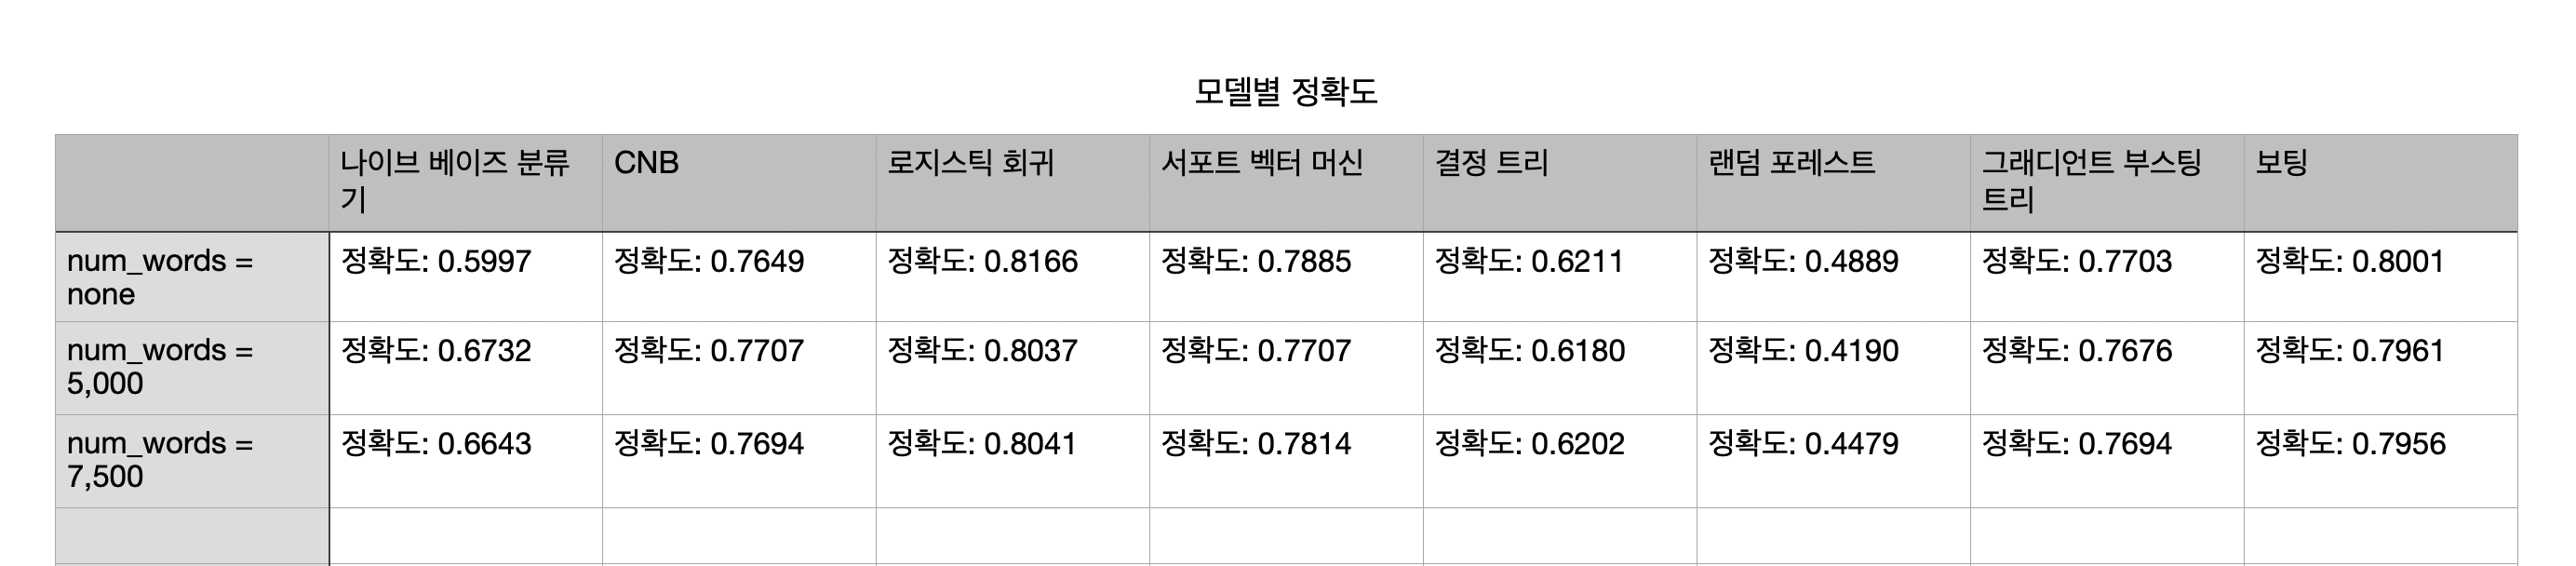

+) 딥러닝 모델 정확도 = 0.7854

가장 성능이 좋은 조합은 num_words= none으로 설정, 로지스틱 회귀 (=0.8106)입니다.




```

로지스틱 회귀가 voting보다 성능이 더 좋게 나왔는데 이러한 이유에는
소프트 보팅(Soft Voting) vs. 하드 보팅(Hard Voting) 차이, 
데이터 불균형 문제가 있는 것 같습니다.

```

# 📌 1. Vocabulary Size에 따른 머신러닝 모델의 성능 변화 분석
### ① 전반적인 성능 변화 경향
* 대부분의 머신러닝 모델에서 num_words = none (제한 없음)일 때 **정확도가 가장 높음**
* 하지만 **나이브 베이즈, CNB는 vocab size가 클수록 오히려 성능이 감소하는 경향**을 보임
* 반면, 로지스틱 회귀, 서포트 벡터 머신(SVM), 보팅 등은 num_words = none에서 최고 성능을 기록

### ② 주요 모델별 분석

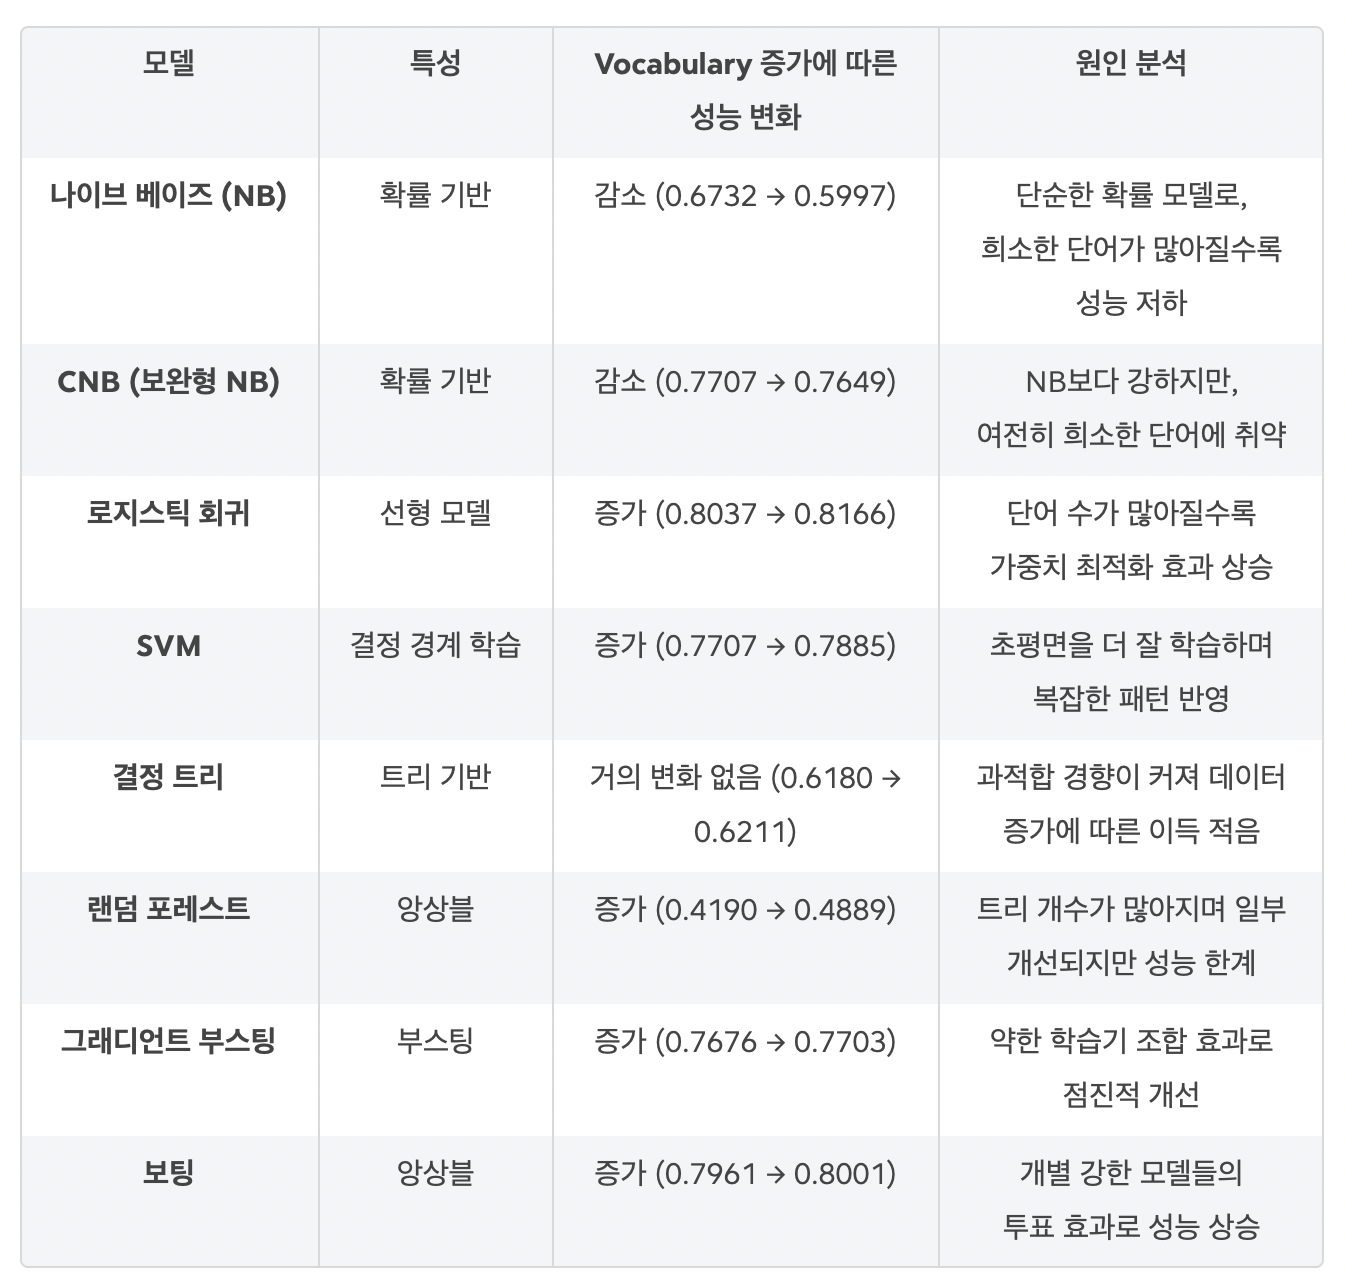

### ③ 왜 CNB/NB는 vocab 증가 시 성능이 낮아질까?
* NB 기반 모델들은 확률적으로 **단어 간 독립성 가정**을 하므로, 불필요한 단어가 많아질수록 모델이 혼란스러워짐
* 특히 희소한 단어들이 많아질수록 과대적합 가능성이 커짐
* 반면, 로지스틱 회귀, SVM은 **가중치를 조절하면서 학습**하므로 성능이 점진적으로 향상


# 📌 2. 딥러닝 (1D-CNN) 모델과의 성능 비교
### ① 1D-CNN 성능 (0.7854)
* 보팅 (0.8001), 로지스틱 회귀 (0.8166)보다 낮음
* 하지만 SVM (0.7885), 그래디언트 부스팅 (0.7703)과 비슷한 수준

### ② 왜 CNN이 기대보다 낮은 성능을 보였을까?

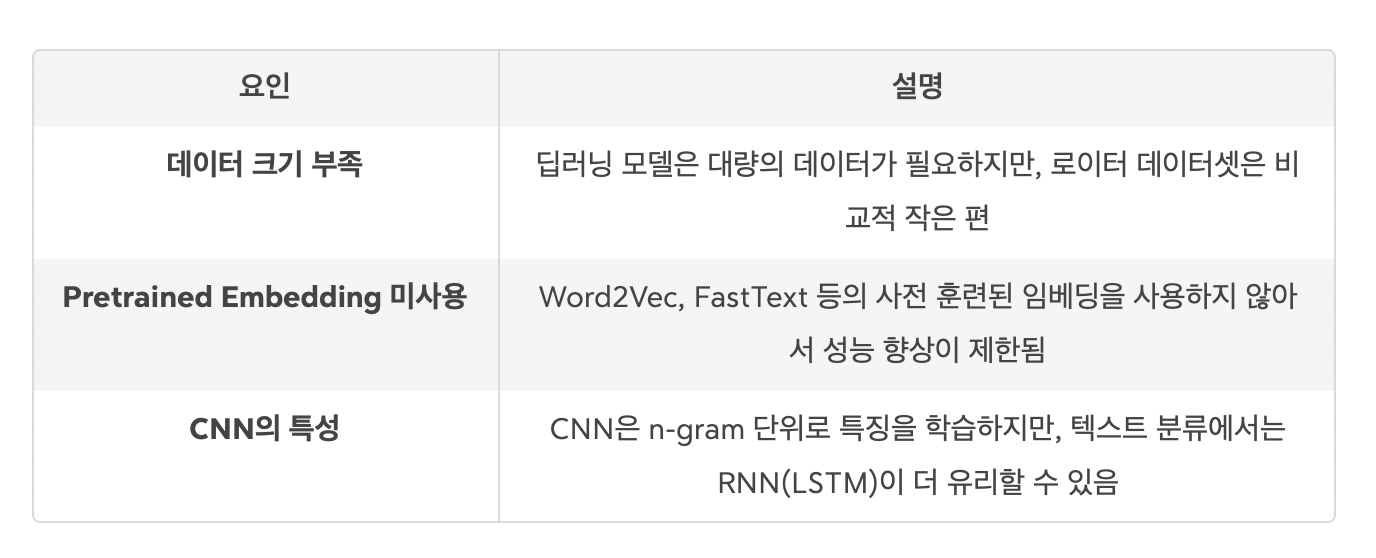

### ③ 머신러닝 모델과 비교했을 때 1D-CNN의 강점
* **데이터가 충분할 경우, CNN은 더욱 강력한 성능**을 발휘할 가능성이 있음
* 머신러닝 모델과 달리 **단어 간의 지역적 패턴(n-gram feature)을 효과적으로 학습** 가능


# 회고

전반적으로 num_words의 수가 높을때 좋은 결과를 보인다는 것을 알게되었다.
균형있는 데이터일때의 결과도 궁금해집니다.

데이터의 특징과 vocab_size에 따라 적합한 분류 모델이 달라지는 것이 신기했습니다.